In [1]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('/content/train.csv', encoding = 'cp949')
df_test = pd.read_csv('/content/test.csv', encoding = 'cp949')
submission = pd.read_csv('/content/sample_submission.csv')

In [3]:
print(df_train.shape, df_test.shape)

(122400, 10) (10080, 9)


In [4]:
train = df_train.copy()
test = df_test.copy()

In [5]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [6]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 한글 열 이름 변경
cols = ["num", "date_time", "energy", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]
cols2 = ["num", "date_time", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]


train.columns = cols
test.columns = cols2

In [8]:
train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [9]:
test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for col in ['temp','windspeed','humidity','precipitation','sun']:
    test[col] = test[col].interpolate(method='linear')

pd.options.display.float_format = '{:.2f}'.format
test.head(10)

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.80,1.50,74.00,0.00,0.00,NaN,NaN
1,1,2020-08-25 01,27.63,1.37,75.33,0.00,0.00,NaN,NaN
2,1,2020-08-25 02,27.47,1.23,76.67,0.00,0.00,NaN,NaN
3,1,2020-08-25 03,27.30,1.10,78.00,0.00,0.00,NaN,NaN
4,1,2020-08-25 04,26.90,1.17,79.67,0.00,0.00,NaN,NaN
5,1,2020-08-25 05,26.50,1.23,81.33,0.00,0.00,NaN,NaN
6,1,2020-08-25 06,26.10,1.30,83.00,0.00,0.00,NaN,NaN
7,1,2020-08-25 07,27.00,1.27,81.00,0.00,0.37,NaN,NaN
8,1,2020-08-25 08,27.90,1.23,79.00,0.00,0.73,NaN,NaN
9,1,2020-08-25 09,28.80,1.20,77.00,0.00,1.10,NaN,NaN


In [11]:
test["cooler"].nunique(), test["solar"].nunique()

(1, 1)

In [12]:
test = test.fillna(0)

In [13]:
test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.80,1.50,74.00,0.00,0.00,0.00,0.00
1,1,2020-08-25 01,27.63,1.37,75.33,0.00,0.00,0.00,0.00
2,1,2020-08-25 02,27.47,1.23,76.67,0.00,0.00,0.00,0.00
3,1,2020-08-25 03,27.30,1.10,78.00,0.00,0.00,0.00,0.00
4,1,2020-08-25 04,26.90,1.17,79.67,0.00,0.00,0.00,0.00


In [14]:
test.isnull().sum()

num              0
date_time        0
temp             0
windspeed        0
humidity         0
precipitation    0
sun              0
cooler           0
solar            0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            122400 non-null  int64  
 1   date_time      122400 non-null  object 
 2   energy         122400 non-null  float64
 3   temp           122400 non-null  float64
 4   windspeed      122400 non-null  float64
 5   humidity       122400 non-null  float64
 6   precipitation  122400 non-null  float64
 7   sun            122400 non-null  float64
 8   cooler         122400 non-null  float64
 9   solar          122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [16]:
# date_time을 datetime으로 변환해주기

train["date_time"] = pd.to_datetime(train["date_time"])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num            122400 non-null  int64         
 1   date_time      122400 non-null  datetime64[ns]
 2   energy         122400 non-null  float64       
 3   temp           122400 non-null  float64       
 4   windspeed      122400 non-null  float64       
 5   humidity       122400 non-null  float64       
 6   precipitation  122400 non-null  float64       
 7   sun            122400 non-null  float64       
 8   cooler         122400 non-null  float64       
 9   solar          122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


In [17]:
train["date"] = train["date_time"].dt.date # 전체 날짜
train["month"] = train["date_time"].dt.month # 월
train["day"] = train["date_time"].dt.day # 일
train["hour"] = train["date_time"].dt.hour
train["weekday"] = train["date_time"].dt.weekday # 0: 월요일
train["weekend"] = train["weekday"].isin([5, 6]).astype(int) # 5: 토요일

train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,2020-06-01,6,1,0,0,0
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,2020-06-01,6,1,1,0,0
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,2,0,0
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,3,0,0
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,4,0,0


In [18]:
test["date_time"] = pd.to_datetime(test["date_time"])

In [19]:
test["date"] = test["date_time"].dt.date # 전체 날짜
test["month"] = test["date_time"].dt.month # 월
test["day"] = test["date_time"].dt.day # 일
test["hour"] = test["date_time"].dt.hour
test["weekday"] = test["date_time"].dt.weekday # 0: 월요일
test["weekend"] = test["weekday"].isin([5, 6]).astype(int) # 5: 토요일

test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend
0,1,2020-08-25 00:00:00,27.80,1.50,74.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,0,1,0
1,1,2020-08-25 01:00:00,27.63,1.37,75.33,0.00,0.00,0.00,0.00,2020-08-25,8,25,1,1,0
2,1,2020-08-25 02:00:00,27.47,1.23,76.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,2,1,0
3,1,2020-08-25 03:00:00,27.30,1.10,78.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,3,1,0
4,1,2020-08-25 04:00:00,26.90,1.17,79.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,4,1,0


In [20]:
# CDH(Cooling Degree Hour) 변수 추가
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,61,1):
    temp = train[train['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
train['CDH'] = cdhs

In [21]:
cdhs = np.array([])
for num in range(1,61,1):
    temp = test[test['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
test['CDH'] = cdhs


In [22]:
# THI(불쾌지수) 변수 추가
train['THI'] = 9/5*train['temp'] - 0.55*(1-train['humidity']/100)*(9/5*train['humidity']-26)+32
test['THI'] = 9/5*test['temp'] - 0.55*(1-test['humidity']/100)*(9/5*test['humidity']-26)+32

In [23]:
# sensible(체감온도) 변수 추가
train['sensible']=13.12+0.6215*train['temp']-13.947*train['windspeed']**0.16+0.486*train['temp']*train['windspeed']**0.16
test['sensible']=13.12+0.6215*test['temp']-13.947*test['windspeed']**0.16+0.486*test['temp']*test['windspeed']**0.16

In [24]:
train

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend,CDH,THI,sensible
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,2020-06-01,6,1,0,0,0,-8.40,57.54,17.81
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,2020-06-01,6,1,1,0,0,-16.70,57.04,17.78
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,2,0,0,-25.20,56.68,17.44
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,3,0,0,-34.10,55.96,16.96
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,4,0,0,-43.10,56.46,16.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.37,27.80,2.30,68.00,0.00,0.70,1.00,1.00,2020-08-24,8,24,19,0,0,30.80,65.07,29.90
122396,60,2020-08-24 20:00:00,3975.70,27.30,1.20,71.00,0.00,0.00,1.00,1.00,2020-08-24,8,24,20,0,0,32.30,64.90,29.39
122397,60,2020-08-24 21:00:00,3572.21,27.30,1.80,71.00,0.00,0.00,1.00,1.00,2020-08-24,8,24,21,0,0,32.50,64.90,29.34
122398,60,2020-08-24 22:00:00,3299.18,27.10,1.80,74.00,0.00,0.00,1.00,1.00,2020-08-24,8,24,22,0,0,31.30,65.45,29.11


In [25]:
test

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend,CDH,THI,sensible
0,1,2020-08-25 00:00:00,27.80,1.50,74.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,0,1,0,1.80,66.71,29.93
1,1,2020-08-25 01:00:00,27.63,1.37,75.33,0.00,0.00,0.00,0.00,2020-08-25,8,25,1,1,0,3.43,66.87,29.75
2,1,2020-08-25 02:00:00,27.47,1.23,76.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,2,1,0,4.90,67.07,29.57
3,1,2020-08-25 03:00:00,27.30,1.10,78.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,3,1,0,6.20,67.30,29.40
4,1,2020-08-25 04:00:00,26.90,1.17,79.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,4,1,0,7.10,67.29,28.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,28.63,3.57,66.00,0.00,0.53,0.00,0.00,2020-08-31,8,31,19,0,0,22.40,66.19,30.88
10076,60,2020-08-31 20:00:00,28.27,3.83,67.00,0.00,0.27,0.00,0.00,2020-08-31,8,31,20,0,0,25.40,65.71,30.43
10077,60,2020-08-31 21:00:00,27.90,4.10,68.00,0.00,0.00,1.00,1.00,2020-08-31,8,31,21,0,0,27.70,65.25,29.97
10078,60,2020-08-31 22:00:00,27.90,4.10,68.00,0.00,0.00,0.00,0.00,2020-08-31,8,31,22,0,0,29.30,65.25,29.97


# 가설1) 습도가 낮고 온도가 높은 날보다, 습도가 높고 온도가 높은 날에 에너지 사용량(에어컨 등)이 높을 것이다.

In [26]:
# THI 80 이상이면 50% 정도 불쾌감을 느낌
train['feel_THI'] = train['THI'].map(lambda x : 1 if x > 80 else 0)
test['feel_THI'] = test['THI'].map(lambda x : 1 if x > 80 else 0)

In [27]:
train['feel_THI'].value_counts()

0    122197
1       203
Name: feel_THI, dtype: int64

In [28]:
test['feel_THI'].value_counts()

0    10068
1       12
Name: feel_THI, dtype: int64

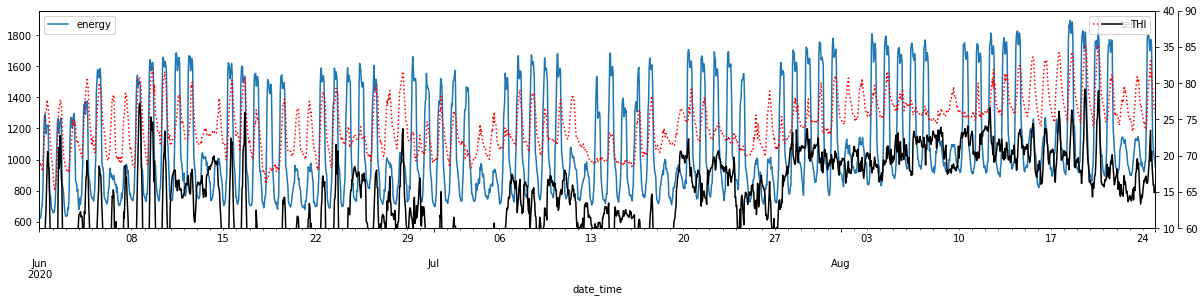

In [29]:
i = 13

fig, ax1 = plt.subplots(figsize = (20, 4))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.02))
# ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
train[train['num'] == i].plot(x = 'date_time', y = ['energy'], ax = ax1)
train[train['num'] == i].plot(x = 'date_time', y = ['temp'], ax = ax2, color = 'r', ls = 'dotted')
train[train['num'] == i].plot(x = 'date_time', y = ['THI'], ax = ax3, color = 'k')

ax2.set_ylim(10, 40)
ax3.set_ylim(60, 90)

plt.show()

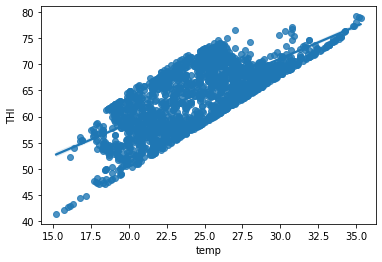

In [30]:
import seaborn as sns

sns.regplot(data = train[train['num'] ==13], x = 'temp', y = 'THI')

- 기온과 습도의 선형변환이기 때문에 새로 생성한 불쾌지수가 기온의 추세와 크게 다르지는 않음


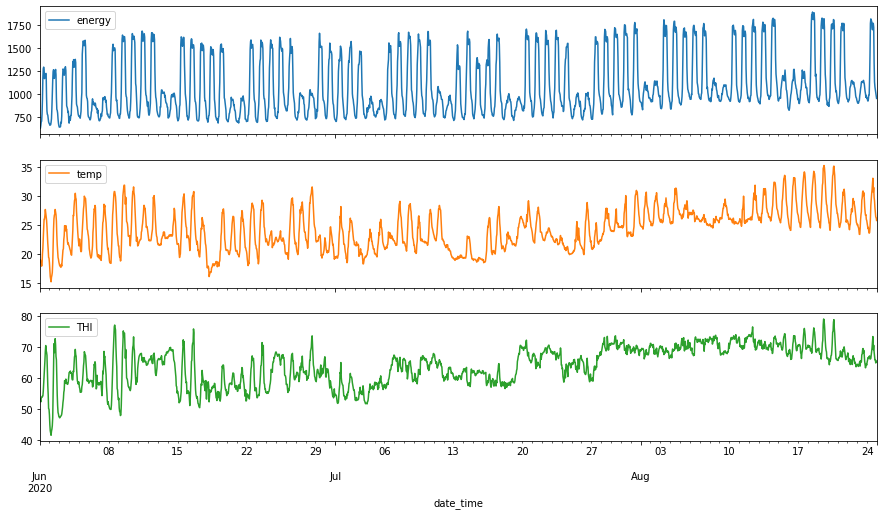

In [31]:
train[train['num'] == 13].plot(x = 'date_time', y = ['energy', 'temp', 'THI'], 
                               subplots = True, figsize = (15, 8))
plt.show()

기온, 불쾌지수, 전력사용량의 추이가 비슷함

# 가설2) 태양광보유에 따라 전력사용량이 차이가 날 것이다.
- 태양광 유무에 따라 전력사용량-불쾌지수-태양광 발전량을 함께 비교
- sun : 일조
- solar : 태양광보유
- solar power : 태양광 발전량

In [32]:
# 태양광 발전량
train['solar power'] =  train['sun'] * train['solar'] * train['precipitation'].map(lambda x : np.exp(-x)) * train['windspeed'] / train['humidity'] * 100

In [33]:
train[train['solar'] == 1]

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,...,month,day,hour,weekday,weekend,CDH,THI,sensible,feel_THI,solar power
4080,3,2020-06-01 00:00:00,3183.62,17.00,2.00,100.00,1.10,0.00,1.00,1.00,...,6,1,0,0,0,-9.00,62.60,17.33,0,0.00
4081,3,2020-06-01 01:00:00,3171.64,17.20,2.30,99.00,0.10,0.00,1.00,1.00,...,6,1,1,0,0,-17.80,62.12,17.43,0,0.00
4082,3,2020-06-01 02:00:00,3175.74,17.20,3.70,98.00,0.00,0.00,1.00,1.00,...,6,1,2,0,0,-26.60,61.31,16.92,0,0.00
4083,3,2020-06-01 03:00:00,3194.86,16.70,3.10,99.00,0.00,0.00,1.00,1.00,...,6,1,3,0,0,-35.90,61.22,16.51,0,0.00
4084,3,2020-06-01 04:00:00,3198.53,16.90,3.50,98.00,0.00,0.00,1.00,1.00,...,6,1,4,0,0,-45.00,60.77,16.62,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.37,27.80,2.30,68.00,0.00,0.70,1.00,1.00,...,8,24,19,0,0,30.80,65.07,29.90,0,2.37
122396,60,2020-08-24 20:00:00,3975.70,27.30,1.20,71.00,0.00,0.00,1.00,1.00,...,8,24,20,0,0,32.30,64.90,29.39,0,0.00
122397,60,2020-08-24 21:00:00,3572.21,27.30,1.80,71.00,0.00,0.00,1.00,1.00,...,8,24,21,0,0,32.50,64.90,29.34,0,0.00
122398,60,2020-08-24 22:00:00,3299.18,27.10,1.80,74.00,0.00,0.00,1.00,1.00,...,8,24,22,0,0,31.30,65.45,29.11,0,0.00


In [34]:
print('태양광 없는 건물 :' , train[train['solar'] == 1]['num'].unique())

태양광 없는 건물 : [ 3  4  8  9 12 14 16 21 23 24 26 27 30 34 36 37 38 39 40 42 43 44 45 47
 51 52 55 56 60]


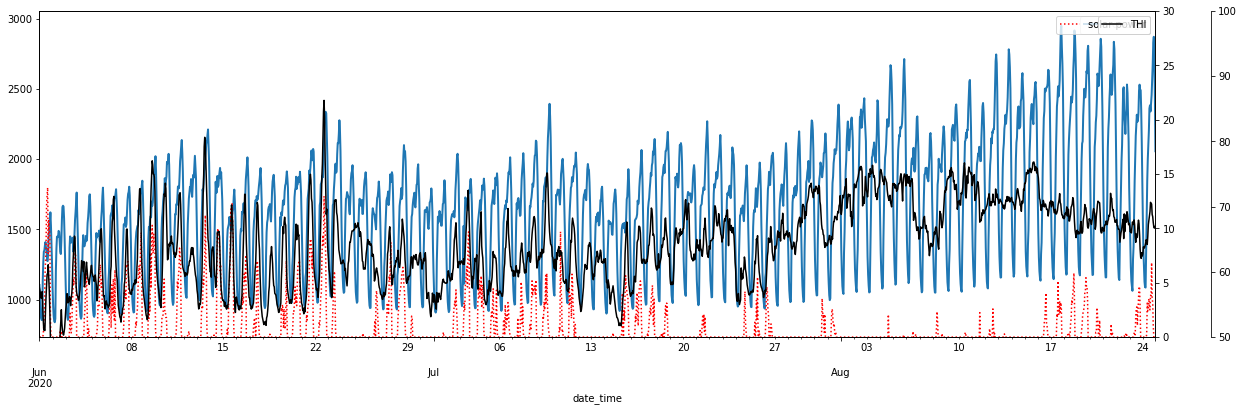

In [35]:
i = 21

fig, ax = plt.subplots(figsize = (20, 4))
ax2 = ax.twinx()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))

train[train['num'] == i].plot(x = 'date_time', y = ['energy'], ax = ax, lw = 2)
train[train['num'] == i].plot(x = 'date_time', y = ['solar power'],figsize = (20, 6), ax = ax2, color = 'r', ls = 'dotted')
train[train['num'] == i].plot(x = 'date_time', y = ['THI'],figsize = (20, 6), ax = ax3, color = 'k')

ax2.set_ylim(0, 30)
ax3.set_ylim(50, 100)
plt.show()

- 태양광이 없을 때 불쾌지수와 발전량의 경향이 유사함

In [36]:
train[train['solar'] == 0]

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,...,month,day,hour,weekday,weekend,CDH,THI,sensible,feel_THI,solar power
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,...,6,1,0,0,0,-8.40,57.54,17.81,0,0.00
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,...,6,1,1,0,0,-16.70,57.04,17.78,0,0.00
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,...,6,1,2,0,0,-25.20,56.68,17.44,0,0.00
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,...,6,1,3,0,0,-34.10,55.96,16.96,0,0.00
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,...,6,1,4,0,0,-43.10,56.46,16.80,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120355,59,2020-08-24 19:00:00,1186.16,27.20,0.10,82.00,0.00,0.00,1.00,0.00,...,8,24,19,0,0,34.00,68.92,29.52,0,0.00
120356,59,2020-08-24 20:00:00,929.23,25.40,2.20,88.00,0.00,0.00,1.00,0.00,...,8,24,20,0,0,35.70,68.98,27.09,0,0.00
120357,59,2020-08-24 21:00:00,1003.10,25.00,1.50,90.00,0.00,0.00,1.00,0.00,...,8,24,21,0,0,36.20,69.52,26.74,0,0.00
120358,59,2020-08-24 22:00:00,1110.67,24.30,0.20,94.00,0.00,0.00,1.00,0.00,...,8,24,22,0,0,33.00,71.01,26.57,0,0.00


In [37]:
print('태양광 있는 건물 :', train[train['solar'] == 0]['num'].unique())

태양광 있는 건물 : [ 1  2  5  6  7 10 11 13 15 17 18 19 20 22 25 28 29 31 32 33 35 41 46 48
 49 50 53 54 57 58 59]


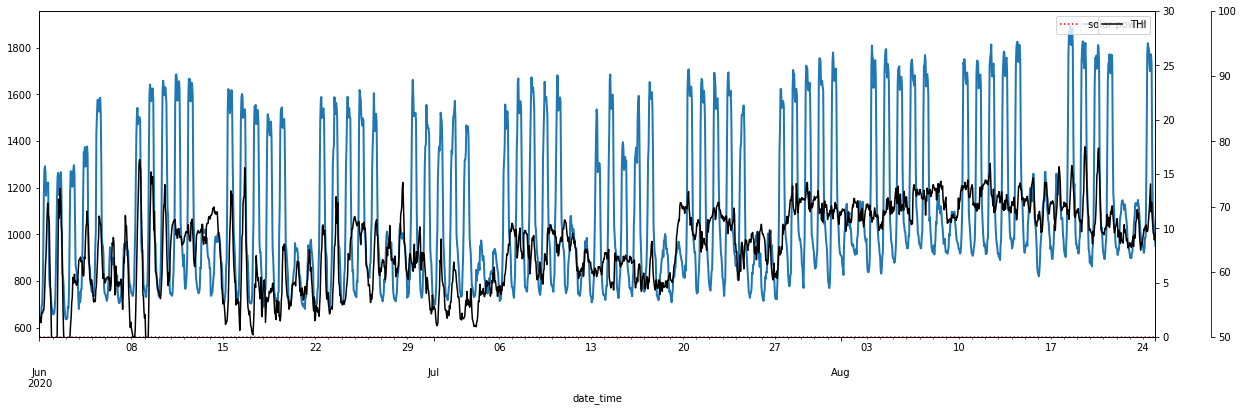

In [38]:
i = 13

fig, ax = plt.subplots(figsize = (20, 4))
ax2 = ax.twinx()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))

train[train['num'] == i].plot(x = 'date_time', y = ['energy'], ax = ax, lw = 2)
train[train['num'] == i].plot(x = 'date_time', y = ['solar power'],figsize = (20, 6), ax = ax2, color = 'r', ls = 'dotted')
train[train['num'] == i].plot(x = 'date_time', y = ['THI'],figsize = (20, 6), ax = ax3, color = 'k')

ax2.set_ylim(0, 30)
ax3.set_ylim(50, 100)
plt.show()

- 태양광이 있을 때 발전량의 정도에 따라 전력사용량이 추세가 달라지는 것으로 보임

# 가설3) 가스냉방기라면 전력사용량을 줄여주는 효과가 있을 것이다.
비전기냉방설비운영???? -> 가스냉방????

*비전기냉방설비는 가스냉방으로 추정됩니다. 가스 냉방은 하절기 전력피크를 완화하기 위해 최근 도입되고 있습니다.*
*가스냉방은 도시가스를 사용해서 냉방기를 가동하는 것으로 train/test 데이터 셋의 정보로는 어느 정도 전력사용량에 영향을 미치는지는 알기 어렵습니다. 다만, 가스냉방기가 있다면 꾸준하게 전력사용량을 줄여주는 효과는 있을 것 같습니다*.